# Model Stacking Performance

This notebook shows performance of the models making up the stack as well as the overall stack.  Data for this work comes from Kaggle's [BNP Paribas Cardif Claims Management](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management) competition.

The competiton required builiding a binary classification model.  Competitors's submissions were scored on the [logloss metric](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management#evaluation).


## Model Stacking Architecture Concept



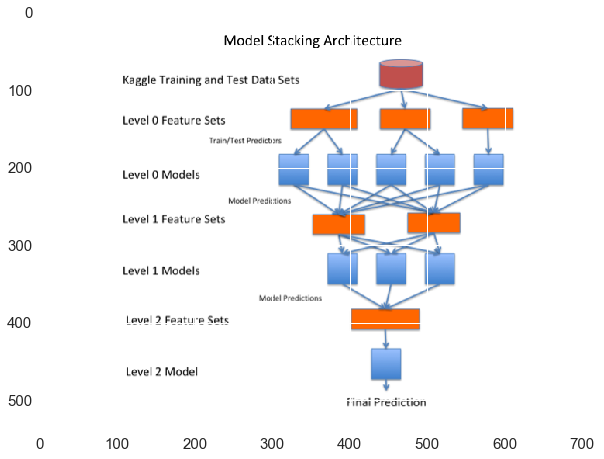

In [35]:
%matplotlib inline

fig, ax = plt.subplots(1)
fig.set_figheight(8)
fig.set_figwidth(10)
ax.

ms_pic = plt.imread('./model_stacking_architecture.png')
ax.imshow(ms_pic)


## Feature Set Used



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model_performance = pd.read_excel('./model_performance_data.xls',sheet_name='model_performance')


In [3]:
data_to_chart = pd.melt(model_performance,id_vars=['model_id'],
                        value_vars=['cv_avg_metric','public_leaderboard','private_leaderboard'])
data_to_chart.sort_values(['value','variable','model_id'],ascending=[False,False,True],inplace=True)


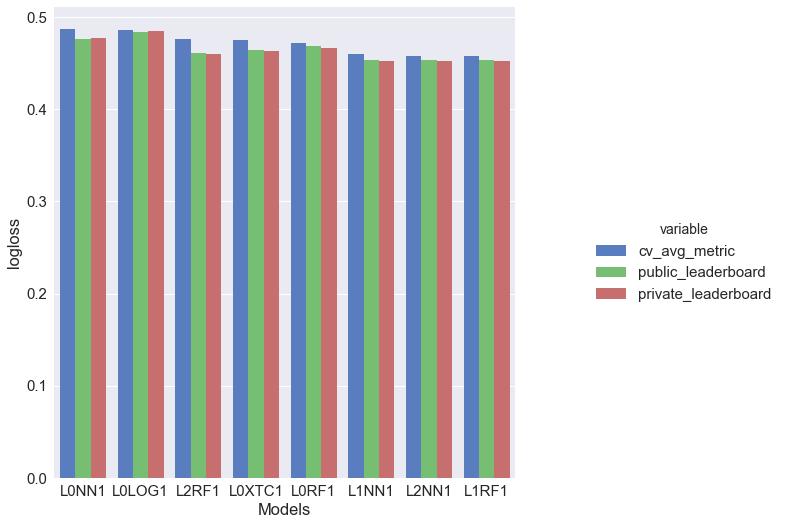

In [23]:
%matplotlib inline
sns.set(font_scale=1.5)
g = sns.factorplot(x="model_id", y="value", hue="variable", data=data_to_chart,
                   hue_order=['cv_avg_metric','public_leaderboard','private_leaderboard'],
                   size=6, kind="bar", palette="muted")
g.set_ylabels("logloss")
g.set_xlabels('Models')
g.fig.set_figheight(8)
g.fig.set_figwidth(12)

In [5]:
idx = [x in set(['L1NN1','L2NN1','L1RF1']) for x in data_to_chart.model_id.tolist()]
data_to_chart2 = data_to_chart.loc[idx,:]

In [6]:
model_performance[['model_id','private_leaderboard']].sort_values(['private_leaderboard'],ascending=[True])

,model_id,private_leaderboard
0,L2NN1,0.45220
1,L1NN1,0.45230
2,L1RF1,0.45270
3,L2RF1,0.45960
4,L0XTC1,0.46373
5,L0RF1,0.46692
6,L0NN1,0.47704
7,L0LOG1,0.48485


In terms of the private leaderboard score, we see the best performing Level 0 model is LXTC1 with a score of 0.48373 and the best performing Level 2 model is L2NN1 with a score of 0.45220.  The Level 2 model reduced the loglos score by 0.0115 or about 2.5% reduction.